In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)
y0 = torch.zeros(100)
x1 = torch.normal(-2*n_data, 1)
y1 = torch.ones(100)

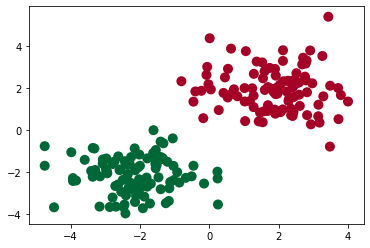

In [3]:
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)
y = torch.cat((y0, y1),).type(torch.LongTensor)
plt.scatter(x[:, 0], x[:, 1],c=y, s=100, lw=0, cmap='RdYlGn')
plt.show()

In [4]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.out = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.out(x)
        return x

net1 = Net(n_feature=2, n_hidden=10, n_output=2)

net2 = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
)
print(net1)
print(net2)

net = net1

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)
Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)


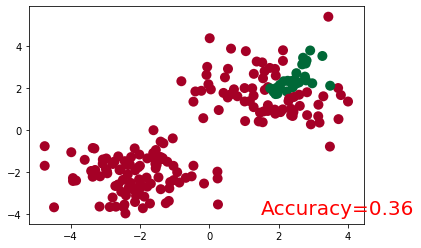

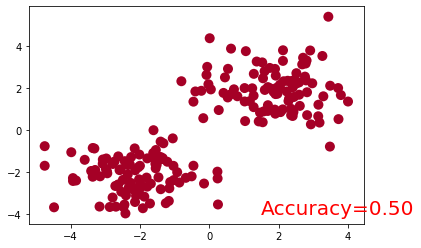

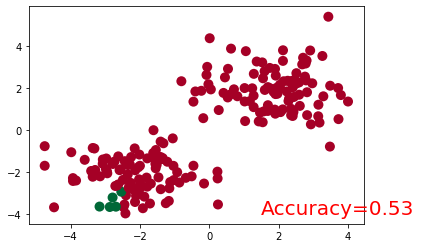

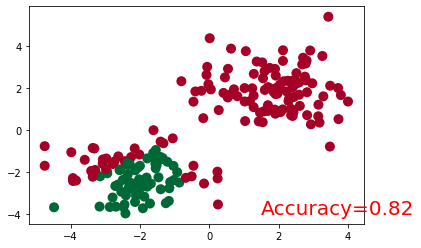

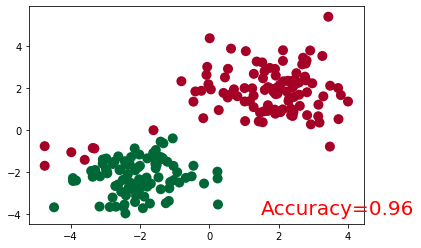

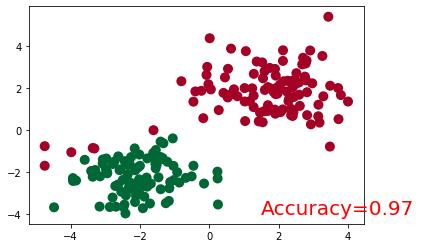

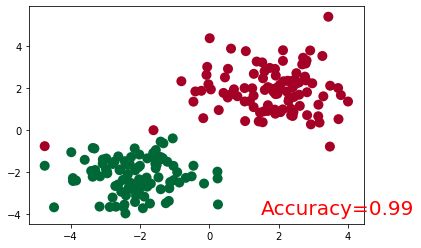

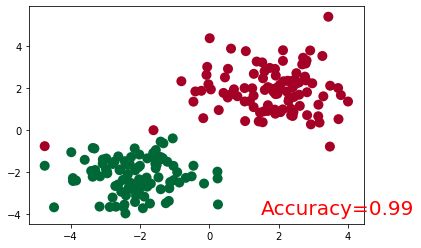

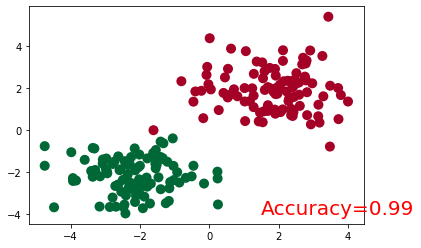

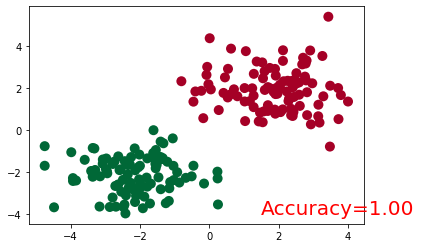

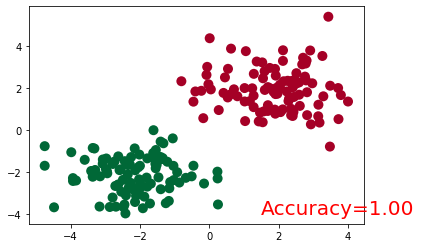

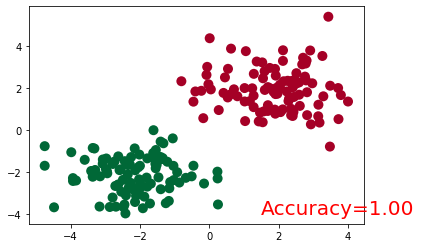

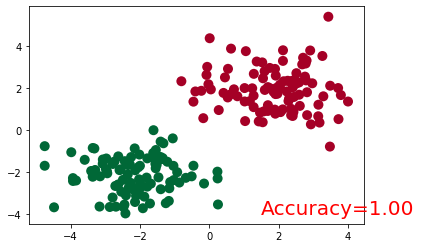

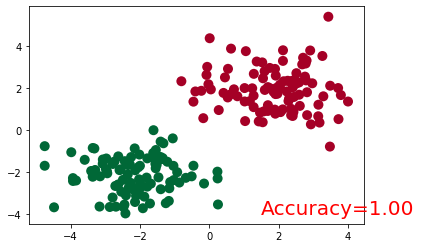

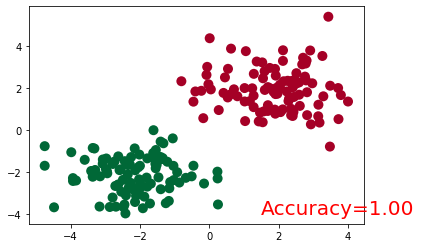

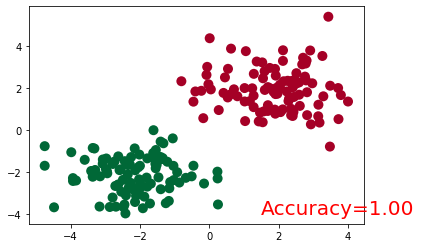

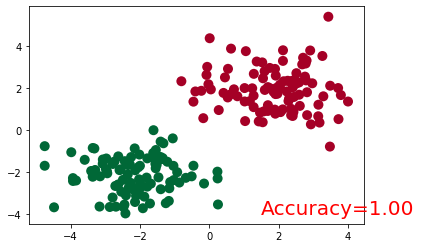

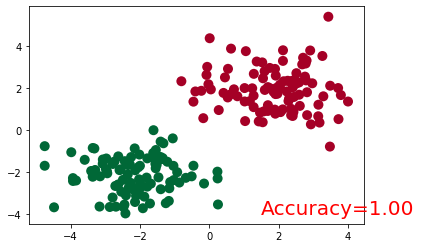

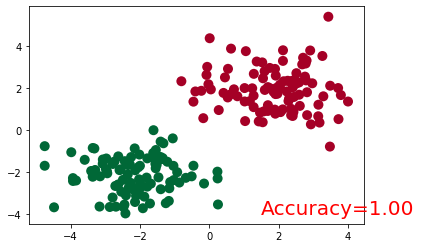

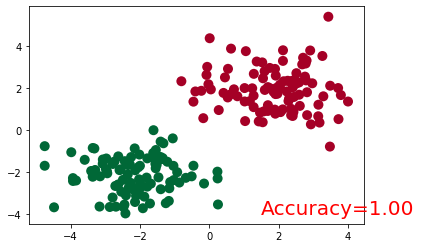

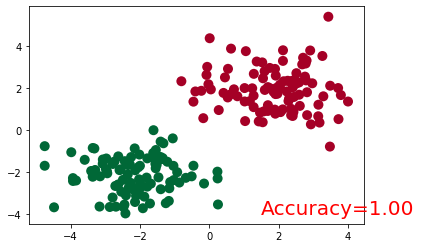

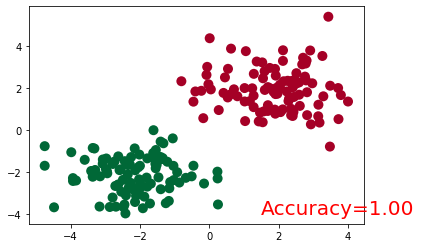

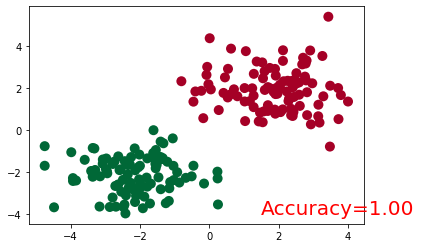

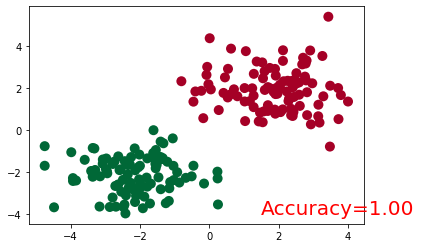

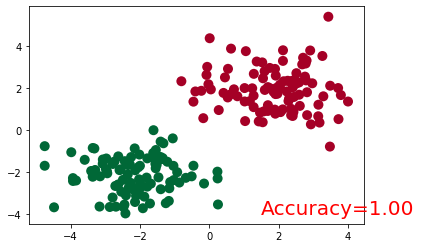

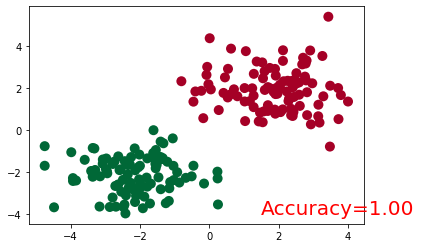

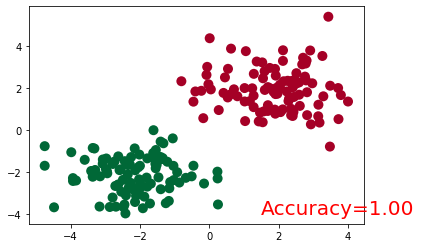

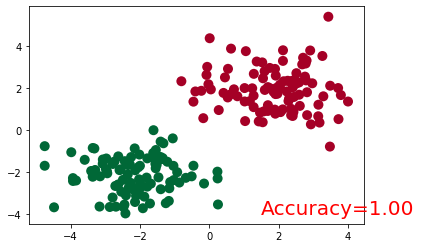

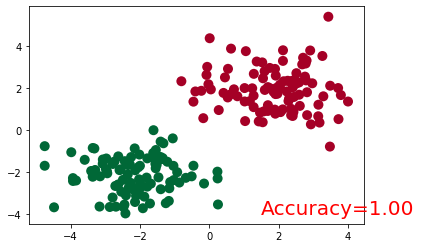

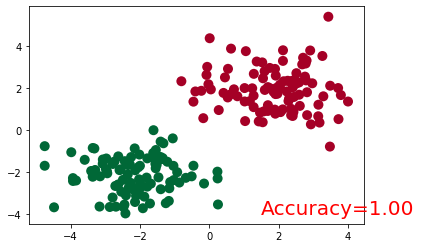

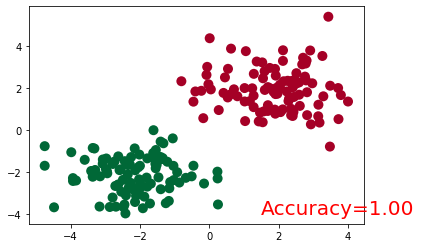

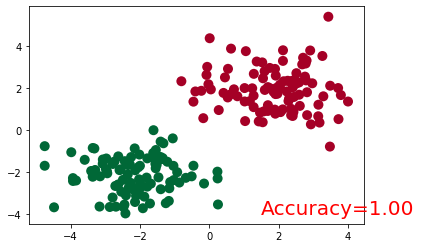

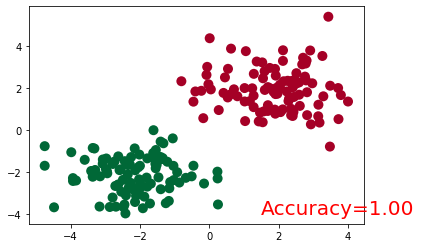

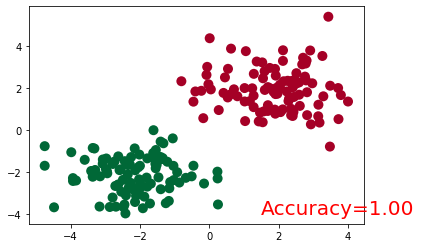

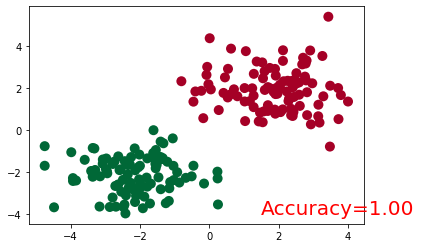

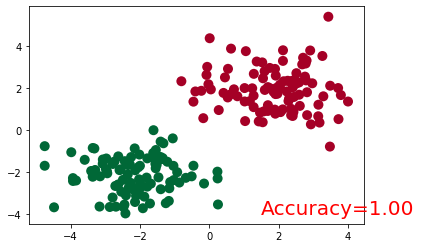

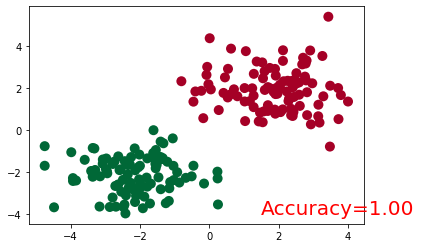

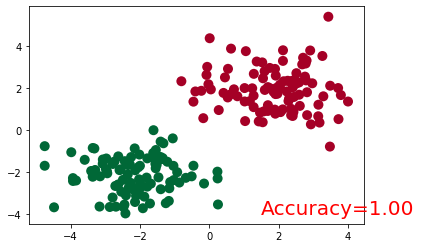

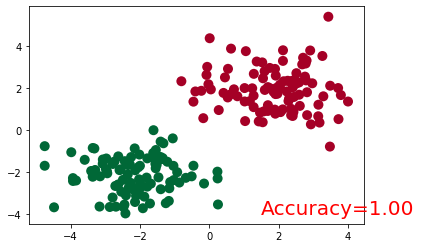

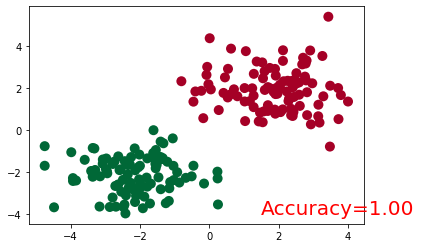

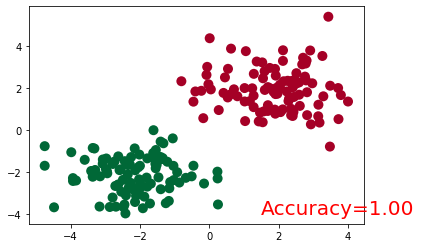

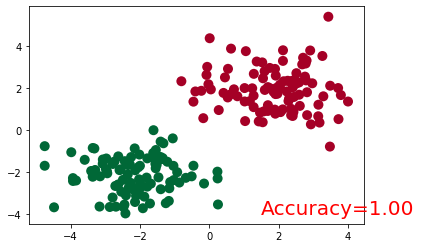

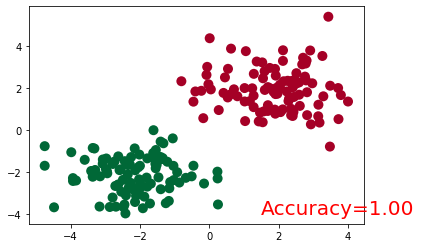

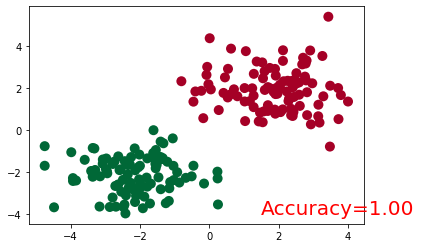

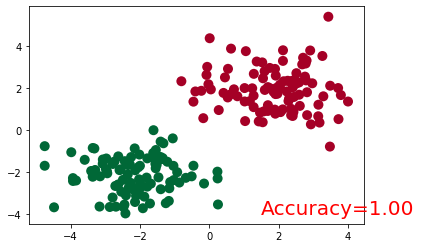

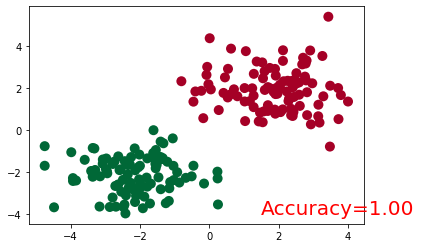

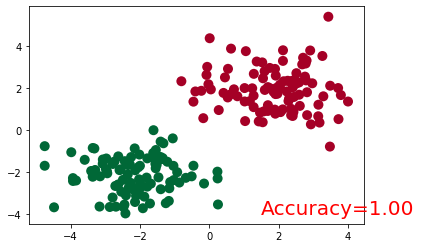

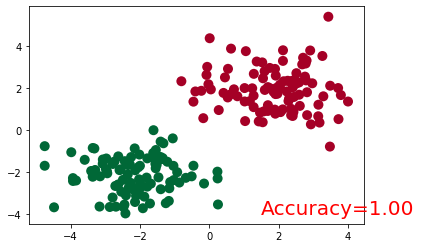

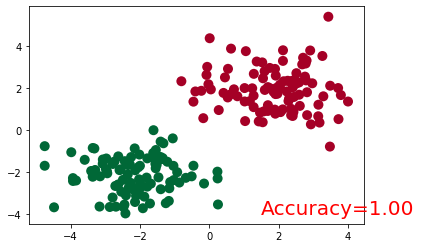

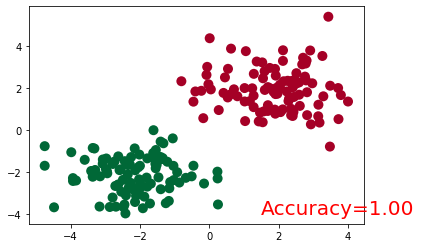

In [5]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
# 算误差的时候, 注意真实值!不是! one-hot 形式的, 
# 而是1D Tensor, (batch,)
# 但是预测值是2D tensor (batch, n_classes)
loss_func = torch.nn.CrossEntropyLoss()

plt.ion()
plt.show()

for t in range(100):
    out = net(x)
    loss = loss_func(out, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t % 2 == 0:
        plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1],
            c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy,
                fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)
        
plt.ioff()
plt.show()